# Machine Learning 
## Data Description

Group 50 Members:

- Clara Pichler, 11917694
- Hannah Knapp, 11901857 
- Niklas Klenner, 11778405

### Overview

1. Data Sets
- Used Data Sets
- Requirements & Dependencies

2. Data Exploration
- Loading in the Data Sets
- Life Expectancy
    - Missing Values
    - Visualizations
- Animals
    - Adding the Class Attribute
    - Missing Values
    - Visualizations




## Data Sets

### Used Datasets

__Life Expectancy:__

- _content_: Global Life Expectancy with Socio-Economic variables 2000-2019
- _timespan_: 2000-2019
- _source_: https://www.kaggle.com/datasets/mjshri23/life-expectancy-and-socio-economic-world-bank?rvi=1
Although many data frames on life expectancy are found on the Kaggle website, we chose this specific one by Shritej Shrikant Chavan, which was updated 2023. It was one of the few data sets that had data up to the year of 2019.


__Animal Dataset:__
- _content_: An In-Depth Animal Information Repository
- _source_: https://www.kaggle.com/datasets/iamsouravbanerjee/animal-information-dataset?resource=download

### Requirements & Dependencies

This project was created using Python 3.12.5 The exact versions of the dependencies can be installed with the following command.

In [ ]:
%pip install -r requirements.txt -q

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.impute import SimpleImputer

## Data Exploration

### Loading in the Data Sets

In [15]:
df_life_exp = pd.read_csv('data/life_expectancy.csv')
df_animals = pd.read_csv('data/Animal_Dataset.csv')

### Life Expectancy

In [29]:
display(df_life_exp.head(5))
df_life_exp.info(verbose=True)
df_life_exp.describe()

,Country Name,Country Code,Region,IncomeGroup,Year,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Corruption,Sanitation,Injuries,Communicable,NonCommunicable
0,Afghanistan,AFG,South Asia,Low income,2001,56.308,47.8,730.0,NaN,NaN,10.809000,NaN,NaN,2179727.10,9689193.70,5795426.38
1,Angola,AGO,Sub-Saharan Africa,Lower middle income,2001,47.059,67.5,15960.0,4.483516,NaN,4.004000,NaN,NaN,1392080.71,11190210.53,2663516.34
2,Albania,ALB,Europe & Central Asia,Upper middle income,2001,74.288,4.9,3230.0,7.139524,3.4587,18.575001,NaN,40.520895,117081.67,140894.78,532324.75
3,Andorra,AND,Europe & Central Asia,High income,2001,NaN,NaN,520.0,5.865939,NaN,NaN,NaN,21.788660,1697.99,695.56,13636.64
4,United Arab Emirates,ARE,Middle East & North Africa,High income,2001,74.544,2.8,97200.0,2.484370,NaN,2.493000,NaN,NaN,144678.14,65271.91,481740.70


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3306 entries, 0 to 3305
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country Name                    3306 non-null   object 
 1   Country Code                    3306 non-null   object 
 2   Region                          3306 non-null   object 
 3   IncomeGroup                     3306 non-null   object 
 4   Year                            3306 non-null   int64  
 5   Life Expectancy World Bank      3118 non-null   float64
 6   Prevelance of Undernourishment  2622 non-null   float64
 7   CO2                             3154 non-null   float64
 8   Health Expenditure %            3126 non-null   float64
 9   Education Expenditure %         2216 non-null   float64
 10  Unemployment                    3002 non-null   float64
 11  Corruption                      975 non-null    float64
 12  Sanitation                      20

,Year,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Corruption,Sanitation,Injuries,Communicable,NonCommunicable
count,3306.000000,3118.000000,2622.000000,3.154000e+03,3126.000000,2216.000000,3002.000000,975.000000,2059.000000,3.306000e+03,3.306000e+03,3.306000e+03
mean,2010.000000,69.748362,10.663654,1.574924e+05,6.364059,4.589014,7.890760,2.860513,52.738785,1.318219e+06,4.686289e+06,7.392488e+06
std,5.478054,9.408154,11.285897,7.726415e+05,2.842844,2.119165,6.270832,0.621343,30.126762,5.214068e+06,1.843727e+07,2.932688e+07
min,2001.000000,40.369000,2.500000,1.000000e+01,1.263576,0.850320,0.100000,1.000000,2.377647,4.304900e+02,3.301600e+02,2.481820e+03
25%,2005.000000,63.642000,2.500000,2.002500e+03,4.205443,3.136118,3.733000,2.500000,24.746007,6.245688e+04,5.776475e+04,3.184758e+05
50%,2010.000000,72.168500,6.200000,1.020500e+04,5.892352,4.371465,5.920000,3.000000,49.317481,2.456910e+05,3.147693e+05,1.350146e+06
75%,2015.000000,76.809000,14.775000,5.877250e+04,8.119166,5.519825,10.097500,3.250000,80.278847,8.465591e+05,2.831636e+06,3.918468e+06
max,2019.000000,84.356341,70.900000,1.070722e+07,24.230680,23.270000,37.250000,4.500000,100.000004,5.563676e+07,2.685646e+08,3.246378e+08


In [30]:
display(df_life_exp["Year"].unique())
display(df_life_exp["Country Code"].unique(), len(df_life_exp["Country Code"].unique()))
display(df_life_exp["Region"].unique())
display(df_life_exp["IncomeGroup"].unique())

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

array(['AFG', 'AGO', 'ALB', 'AND', 'ARE', 'ARG', 'ARM', 'ASM', 'ATG',
       'AUS', 'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BFA', 'BGD', 'BGR',
       'BHR', 'BIH', 'BLR', 'BLZ', 'BMU', 'BOL', 'BRA', 'BRB', 'BTN',
       'BWA', 'CAF', 'CAN', 'CHE', 'CHL', 'CHN', 'CIV', 'CMR', 'COL',
       'COM', 'CRI', 'CUB', 'CYP', 'DEU', 'DJI', 'DMA', 'DNK', 'DOM',
       'DZA', 'ECU', 'ERI', 'ESP', 'EST', 'ETH', 'FIN', 'FJI', 'FRA',
       'GAB', 'GBR', 'GEO', 'GHA', 'GIN', 'GNB', 'GNQ', 'GRC', 'GRD',
       'GRL', 'GTM', 'GUM', 'GUY', 'HND', 'HRV', 'HTI', 'HUN', 'IDN',
       'IND', 'IRL', 'IRQ', 'ISL', 'ISR', 'ITA', 'JAM', 'JOR', 'JPN',
       'KAZ', 'KEN', 'KHM', 'KIR', 'KWT', 'LBN', 'LBR', 'LBY', 'LKA',
       'LSO', 'LTU', 'LUX', 'LVA', 'MAR', 'MCO', 'MDA', 'MDG', 'MDV',
       'MEX', 'MHL', 'MKD', 'MLI', 'MLT', 'MMR', 'MNE', 'MNG', 'MNP',
       'MOZ', 'MRT', 'MUS', 'MWI', 'MYS', 'NAM', 'NER', 'NGA', 'NIC',
       'NLD', 'NOR', 'NPL', 'NRU', 'NZL', 'OMN', 'PAK', 'PAN', 'PER',
       'PHL', 'PLW',

174

array(['South Asia', 'Sub-Saharan Africa', 'Europe & Central Asia',
       'Middle East & North Africa', 'Latin America & Caribbean',
       'East Asia & Pacific', 'North America'], dtype=object)

array(['Low income', 'Lower middle income', 'Upper middle income',
       'High income'], dtype=object)

Through the above code, we were able to have a first glimpse into the life expectancy dataset. The data ranges from the years 2001 till 2019 and has information about 174 unique countries across the world. We mostly want to focus on the feature _Life Expectancy World Bank_, since we want to predict it through regression. In the following steps we will transform the dataset to make it easier to work with and also look at the missing values.

### Missing Values

Country Name                         0
Country Code                         0
Region                               0
IncomeGroup                          0
Year                                 0
Life Expectancy World Bank         188
Prevelance of Undernourishment     684
CO2                                152
Health Expenditure %               180
Education Expenditure %           1090
Unemployment                       304
Corruption                        2331
Sanitation                        1247
Injuries                             0
Communicable                         0
NonCommunicable                      0
dtype: int64

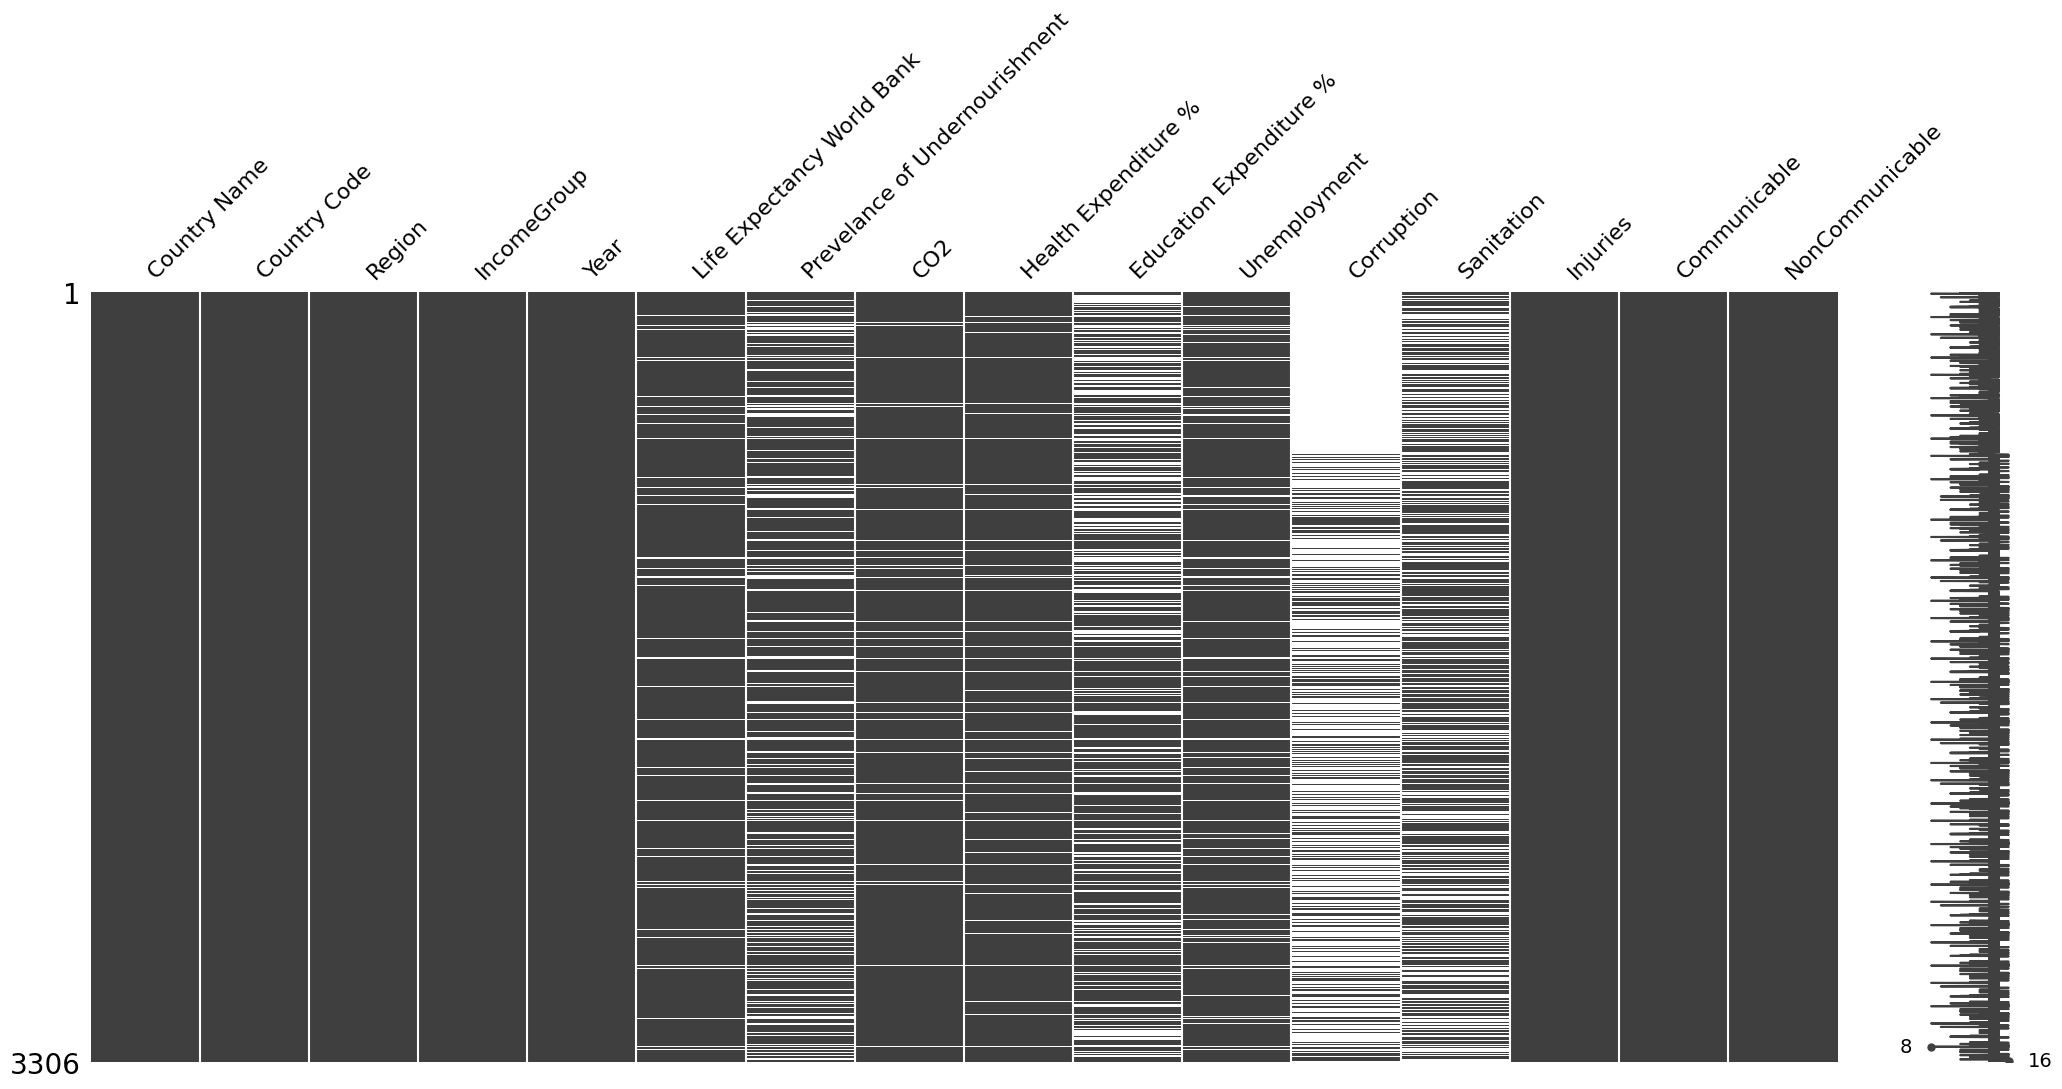

In [31]:
msno.matrix(df_life_exp)
df_life_exp.isna().sum()

There are numerous possibilities to deal with missing values. Although it sounds lazy, __sometimes__ one can just delete a feature or row if it's not worth it to fill the missing values in since the given data is not enough to fill out the missing values correctly. 

In [32]:
display(df_life_exp[df_life_exp["Life Expectancy World Bank"].isna()]["Country Name"], )
display(df_life_exp[df_life_exp["Unemployment"].isna()]["Country Name"])
display(df_life_exp[df_life_exp["Life Expectancy World Bank"].isna() & df_life_exp["Unemployment"].isna()]["Country Name"].unique())

3                        Andorra
7                 American Samoa
42                      Dominica
95                        Monaco
100             Marshall Islands
                  ...           
3239    Northern Mariana Islands
3252                       Nauru
3259                       Palau
3275                  San Marino
3293                      Tuvalu
Name: Country Name, Length: 188, dtype: object

3                   Andorra
7            American Samoa
8       Antigua and Barbuda
22                  Bermuda
42                 Dominica
               ...         
3252                  Nauru
3259                  Palau
3275             San Marino
3284             Seychelles
3293                 Tuvalu
Name: Country Name, Length: 304, dtype: object

array(['Andorra', 'American Samoa', 'Dominica', 'Monaco',
       'Marshall Islands', 'Northern Mariana Islands', 'Nauru', 'Palau',
       'San Marino', 'Tuvalu'], dtype=object)

### Visualizations

In [45]:
df_life_exp_short = df_life_exp.rename(columns={
    'Country Name': 'CountryName',
    'Country Code': 'CountryCode',
    'Region': 'Region',
    'IncomeGroup': 'Income',
    'Year': 'Year',
    'Life Expectancy World Bank': 'LifeEx',
    'Prevelance of Undernourishment': 'PoU',
    'CO2': 'CO2',
    'Health Expenditure %': 'Health',
    'Education Expenditure %': 'Educ',
    'Unemployment': 'Unempl',
    'Corruption': 'Corrupt',
    'Sanitation': 'Sanitation',
    'Injuries': 'Injuries',
    'Communicable': 'Comm',
    'NonCommunicable': 'NonComm'
})

In [47]:
fig = px.scatter_matrix(df_life_exp_short[df_life_exp_short['Year']==2019],
    dimensions=["LifeEx", "Unempl", "Health", 'Educ', 'PoU', 'CO2'],
    color="Income")
fig.show()

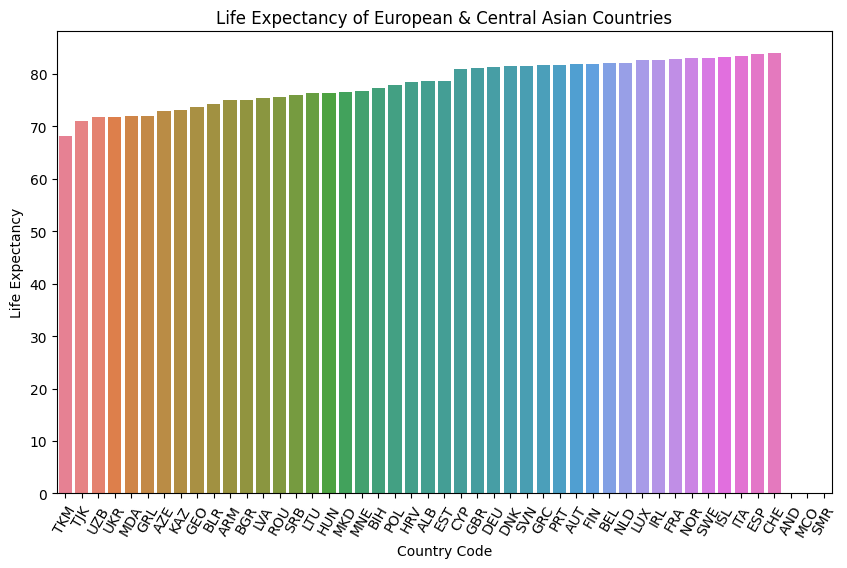

In [51]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Country Code', y='Life Expectancy World Bank', hue='Country Code', data=df_life_exp[(df_life_exp['Year']==2019) & (df_life_exp['Region']=='Europe & Central Asia')].sort_values('Life Expectancy World Bank'))
plt.title('Life Expectancy of European & Central Asian Countries')
plt.xlabel('Country Code')
plt.ylabel('Life Expectancy')
plt.xticks(rotation=60)
plt.show()

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'LifeEx'}>,
        <Axes: title={'center': 'PoU'}>],
       [<Axes: title={'center': 'CO2'}>,
        <Axes: title={'center': 'Health'}>,
        <Axes: title={'center': 'Educ'}>],
       [<Axes: title={'center': 'Unempl'}>,
        <Axes: title={'center': 'Corrupt'}>,
        <Axes: title={'center': 'Sanitation'}>],
       [<Axes: title={'center': 'Injuries'}>,
        <Axes: title={'center': 'Comm'}>,
        <Axes: title={'center': 'NonComm'}>]], dtype=object)

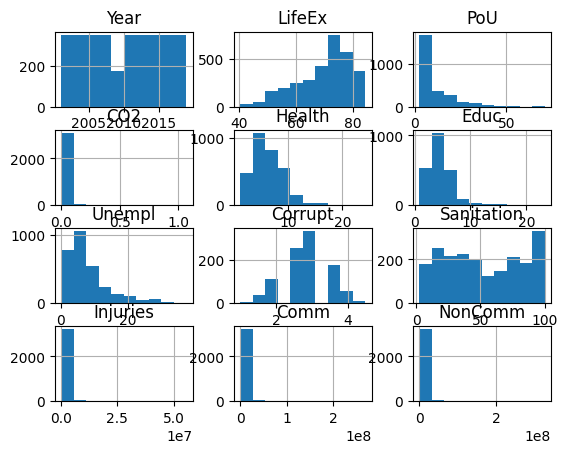

In [48]:
df_life_exp_short.hist()

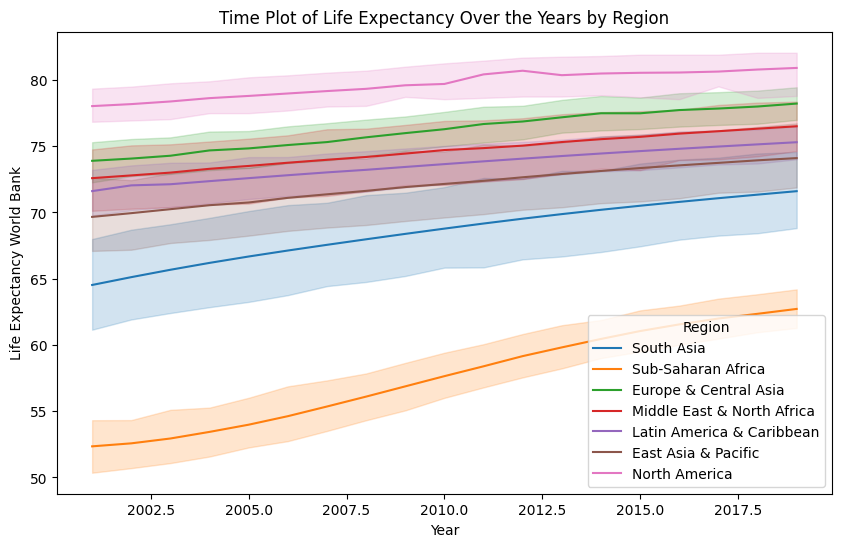

In [33]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Life Expectancy World Bank', hue='Region', data=df_life_exp)
plt.title('Time Plot of Life Expectancy Over the Years by Region')
plt.show()

In [38]:
corrmat_life_exp = df_life_exp.corr(method='pearson', numeric_only=True)

<Axes: >

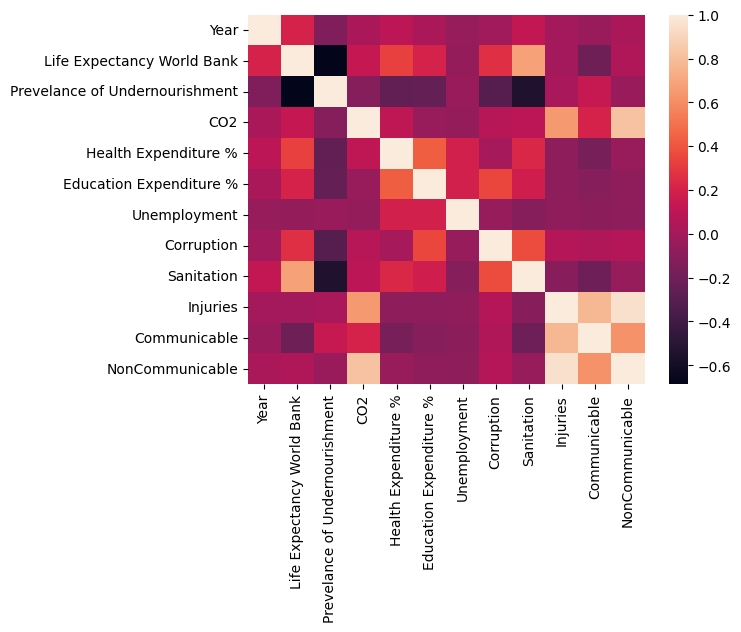

In [39]:
sns.heatmap(corrmat_life_exp)

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Country Code', y='Life Expectancy World Bank', hue='Country Code', data=df_life_exp[(df_life_exp['Year']==2019) & (df_life_exp['Region']=='Europe & Central Asia')])
plt.title('Life Expectancy of European & Central Asian Countries')
plt.xlabel('Country Code')
plt.ylabel('Life Expectancy')
plt.xticks(rotation=60)
plt.show()

### Animals

Through the following few code snippets we received some first glimpse on the data set e.g. the column names, types of the attributes and unique values. 

In [24]:
display(df_animals.head(5))
display(df_animals.info(verbose=True))

,Animal,Height (cm),Class,Weight (kg),Color,Lifespan (years),Diet,Habitat,Predators,Average Speed (km/h),Countries Found,Conservation Status,Family,Gestation Period (days),Top Speed (km/h),Social Structure,Offspring per Birth
0,Aardvark,105-130,mammal,40-65,Grey,20-30,Insectivore,"Savannas, Grasslands","Lions, Hyenas",40,Africa,Least Concern,Orycteropodidae,210-240,40,Solitary,1
1,Aardwolf,40-50,mammal,8-14,Yellow-brown,10-12,Insectivore,"Grasslands, Savannas","Lions, Leopards",24-30,Eastern and Southern Africa,Least Concern,Hyaenidae,90,40,Solitary,2-5
2,African Elephant,270-310,mammal,2700-6000,Grey,60-70,Herbivore,"Savannah, Forest","Lions, Hyenas",25,Africa,Vulnerable,Elephantidae,640-660,40,Herd-based,1
3,African Lion,80-110,mammal,120-250,Tan,10-14,Carnivore,"Grasslands, Savannas","Hyenas, Crocodiles",58,Africa,Vulnerable,Felidae,98-105,80,Group-based,2-4 (usually)
4,African Wild Dog,75-80,mammal,18-36,Multicolored,10-12,Carnivore,Savannahs,"Lions, Hyenas",56,Sub-Saharan Africa,Endangered,Canidae,70,56,Group-based,10-12


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Animal                   205 non-null    object
 1   Height (cm)              205 non-null    object
 2   Class                    189 non-null    object
 3   Weight (kg)              205 non-null    object
 4   Color                    205 non-null    object
 5   Lifespan (years)         205 non-null    object
 6   Diet                     205 non-null    object
 7   Habitat                  205 non-null    object
 8   Predators                205 non-null    object
 9   Average Speed (km/h)     205 non-null    object
 10  Countries Found          205 non-null    object
 11  Conservation Status      205 non-null    object
 12  Family                   205 non-null    object
 13  Gestation Period (days)  205 non-null    object
 14  Top Speed (km/h)         205 non-null    o

None

In [23]:
display(df_animals["Diet"].unique(), len(df_animals["Diet"].unique()))
display(df_animals["Social Structure"].unique(), len(df_animals["Social Structure"].unique()))
display(df_animals["Conservation Status"].unique(), len(df_animals["Conservation Status"].unique()))

array(['Insectivore', 'Herbivore', 'Carnivore', 'Omnivore',
       'Carnivore, Piscivore', 'Omnivore, Insectivore',
       'Herbivore, Omnivore', 'Filter Feeder', 'Piscivore',
       'Insectivore, Herbivore', 'Scavenger', 'Carnivore, Scavenger',
       'Nectar, Insects', 'Carnivore, Insectivore', 'Omnivore, Herbivore',
       'Herbivore, Insectivore'], dtype=object)

16

array(['Solitary', 'Herd-based', 'Group-based', 'Colony-based', 'Flocks',
       'Social groups', 'Social pods', 'Pack-based', 'Varies', 'Eusocial'],
      dtype=object)

10

array(['Least Concern', 'Vulnerable', 'Endangered', 'Not Evaluated',
       'Near Threatened', 'Not Applicable', 'Critically Endangered',
       'Varies', 'Data Deficient', 'Extinct',
       'Extinct (around 58 million years ago)',
       'Extinct (around 4,000 years ago)'], dtype=object)

12

Some questions that arised are why there are more entries than unique animals (so some are doubled), how we will handle multiple habitats and preditors and the numeric values like height or weight which are given in spans. This will be covered in the preprocessing part of the project.

#### Adding the Class Attribute

We want to classify the animals into their major biological groups. Finding a data set that works for us and is open source was quite hard to achieve, therefore, we are adding the class feature through ChatGPT. Although we know that using a generative AI is not the purpose for this exercise it would have been an enormous effort to this manually. However, we will of course go over the classification it gave us and made corrections if necessary. 

We wanted to be fully transparent with our work process so we explain everything in detail. This is the promt we gave ChatGPT:

--- 

Hello, 
I have an array with animal names. Return please an arrays with the same structure where the classes of the animals are given, e.g animals[i]=='dog' then class[i]=='mammal'

These classes will be used:

mammal, bird, reptile, amphibian, fish, arthropod, vertebrate, invertebrate

If there is an animals where one class does not fit or you do not recognise this animals use NAN as the class but not as a string like the others and give the explanation why you entered NAN.

This is the animal array:

['Aardvark', 'Aardwolf', 'African Elephant', 'African Lion',
'African Wild Dog', 'Alpine Ibex', 'Amazon Rainforest Frog',
'American Bison', 'Anteater', 'Arabian Horse', 'Arabian Oryx',
'Arctic Fox', 'Arowana', 'Asian Elephant', 'Atlantic Puffin',
'Atlantic Spotted Dolphin', 'Australian Fur Seal', 'Axolotl',
'Aye-Aye', "Baird's Tapir", 'Bald Eagle', 'Banded Palm Civet',
'Barbary Macaque', 'Basking Shark', 'Bearded Dragon', 'Bengal Fox',

...

'Titanoboa', 'Toco Toucan', 'Tree Kangaroo', 'Tsetse Fly',
'Tuatara', 'Tufted Puffin', 'Uakari', 'Vampire Bat', 'Vaquita',
'Vulture', 'Walrus', 'Warthog', 'Water Buffalo', 'Western Gorilla',
'Western Lowland Gorilla', 'Whale Shark', 'White Rhinoceros',
'White Tiger', 'Wild Boar', 'Wildebeest', 'Wolf', 'Wolverine',
'Wombat', 'Woodpecker', 'Woolly Mammoth', 'Yak',
'Yellow-Eyed Penguin', 'Yeti Crab', 'Zebra', 'Zebra Shark']

---

ChatGPT got the full array `df_animals["Animal"].unique()`, however, we have shorten it here for readability. Only the following code cell was created by ChatGPT, nothing else.

In [11]:
def get_animal_classes(animals):
    classes = []
    animal_classification = {
        'mammal': [
            'Aardvark', 'Aardwolf', 'African Elephant', 'African Lion', 'African Wild Dog', 'Alpine Ibex',
            'American Bison', 'Anteater', 'Arabian Horse', 'Arabian Oryx', 'Arctic Fox', 'Asian Elephant',
            'Australian Fur Seal', 'Aye-Aye', "Baird's Tapir", 'Banded Palm Civet', 'Barbary Macaque',
            'Bengal Fox', 'Bengal Tiger', 'Black Rhinoceros', 'Blue Whale', 'Bonobo', 'Bornean Orangutan',
            'Bottlenose Dolphin', 'Boxer Dog', 'Brown Bear', 'Capybara', 'Cheetah', 'Chimpanzee',
            "Coquerel's Sifaka", 'Dalmatian Dog', 'Dhole', 'Dingo', 'Dugong', 'Eastern Gorilla', 'Echidna',
            'Emperor Tamarin', 'European Hedgehog', 'Fennec Fox', 'Flying Fox', 'Fossa', 'Gaur', 'Gerenuk',
            'Giant Panda', 'Golden Lion Tamarin', "Grevy's Zebra", 'Harp Seal', 'Hippopotamus', 'Iberian Lynx',
            'Indri', 'Japanese Macaque', 'Kangaroo Rat', 'Lemur', 'Lion-tailed Macaque', 'Lyrebird', 'Maned Wolf',
            'Markhor', 'Meerkat', 'Mountain Gorilla', 'Naked Mole Rat', 'Numbat', 'Okapi', 'Orangutan', 'Pangolin',
            'Patagonian Mara', 'Pink Fairy Armadillo', 'Platypus', 'Polar Bear', 'Proboscis Monkey', 'Pronghorn',
            'Quokka', 'Red Fox', 'Red Kangaroo', 'Red Panda', 'Rottweiler', 'Saola', 'Serval', 'Siberian Husky',
            'Sloth', 'Slow Loris', 'Snow Leopard', 'Spectacled Bear', 'Spider Monkey', 'Spotted Hyena',
            'Squirrel Monkey', 'Star-Nosed Mole', 'Sumatran Orangutan', 'Sumatran Rhino', 'Sumatran Rhinoceros',
            'Sumatran Tiger', 'Sun Bear', 'Tapir', 'Tarsier', 'Tasmanian Devil', 'Three-Toed Sloth',
            'Tibetan Mastiff', 'Tiger', 'Tree Kangaroo', 'Uakari', 'Vampire Bat', 'Vaquita', 'Walrus', 'Warthog',
            'Water Buffalo', 'Western Gorilla', 'Western Lowland Gorilla', 'White Rhinoceros', 'White Tiger',
            'Wild Boar', 'Wildebeest', 'Wolf', 'Wolverine', 'Wombat', 'Yak', 'Zebra'
        ],
        'bird': [
            'Atlantic Puffin', 'Bald Eagle', 'Blue Jay', 'Blue-Footed Booby', 'Emperor Penguin', 'Galápagos Penguin',
            'Galápagos Tortoise', 'Golden Poison Dart Frog', 'Harpy Eagle', 'Hummingbird', 'Kakapo', 'Kiwi',
            'Lyrebird', 'Secretary Bird', 'Shoebill', 'Snowy Owl', 'Toco Toucan', 'Tufted Puffin', 'Vulture',
            'Woodpecker', 'Yellow-Eyed Penguin'
        ],
        'reptile': [
            'Bearded Dragon', 'Burmese Python', 'Common Snapping Turtle', 'Frilled Lizard', 'Gharial', 'Gila Monster',
            'Green Anaconda', 'Green Sea Turtle', 'King Cobra', 'Komodo Dragon', 'Leaf-tailed Gecko',
            'Malayan Krait', 'Monitor Lizard', 'Thorny Devil', 'Titanoboa'
        ],
        'amphibian': [
            'Amazon Rainforest Frog', 'Axolotl', 'Chinese Giant Salamander', 'Fire Salamander', 'Glass Frog',
            'Red-Eyed Tree Frog'
        ],
        'fish': [
            'Arowana', 'Basking Shark', 'Blobfish', 'Clownfish', 'Coelacanth', 'Electric Eel', 'Goblin Shark',
            'Great White Shark', 'Leafy Sea Dragon', 'Pufferfish', 'Shortfin Mako Shark', 'Whale Shark',
            'Zebra Shark'
        ],
        'arthropod': [
            'Brazilian Wandering Spider', 'Blue Morpho Butterfly', 'Horseshoe Crab', 'Japanese Giant Hornet',
            'Mantis Shrimp', 'Peacock Mantis Shrimp', 'Praying Mantis', 'Tsetse Fly', 'Yeti Crab'
        ],
        'vertebrate': ['Galliformes'],
        'invertebrate': ['Nudibranch', 'Termite']
    }

    for animal in animals:
        classified = False
        for animal_class, members in animal_classification.items():
            if animal in members:
                classes.append(animal_class)
                classified = True
                break
        if not classified:
            classes.append(np.nan) 

    return classes

In [16]:
classes = get_animal_classes(df_animals["Animal"])

In [17]:
df_animals.insert(2, "Class", classes, True)

display(df_animals.head(5))

,Animal,Height (cm),Class,Weight (kg),Color,Lifespan (years),Diet,Habitat,Predators,Average Speed (km/h),Countries Found,Conservation Status,Family,Gestation Period (days),Top Speed (km/h),Social Structure,Offspring per Birth
0,Aardvark,105-130,mammal,40-65,Grey,20-30,Insectivore,"Savannas, Grasslands","Lions, Hyenas",40,Africa,Least Concern,Orycteropodidae,210-240,40,Solitary,1
1,Aardwolf,40-50,mammal,8-14,Yellow-brown,10-12,Insectivore,"Grasslands, Savannas","Lions, Leopards",24-30,Eastern and Southern Africa,Least Concern,Hyaenidae,90,40,Solitary,2-5
2,African Elephant,270-310,mammal,2700-6000,Grey,60-70,Herbivore,"Savannah, Forest","Lions, Hyenas",25,Africa,Vulnerable,Elephantidae,640-660,40,Herd-based,1
3,African Lion,80-110,mammal,120-250,Tan,10-14,Carnivore,"Grasslands, Savannas","Hyenas, Crocodiles",58,Africa,Vulnerable,Felidae,98-105,80,Group-based,2-4 (usually)
4,African Wild Dog,75-80,mammal,18-36,Multicolored,10-12,Carnivore,Savannahs,"Lions, Hyenas",56,Sub-Saharan Africa,Endangered,Canidae,70,56,Group-based,10-12


### Missing Values

Now we will take a look at the missing values the data set might have.

Animal                      0
Height (cm)                 0
Class                      16
Weight (kg)                 0
Color                       0
Lifespan (years)            0
Diet                        0
Habitat                     0
Predators                   0
Average Speed (km/h)        0
Countries Found             0
Conservation Status         0
Family                      0
Gestation Period (days)     0
Top Speed (km/h)            0
Social Structure            0
Offspring per Birth         0
dtype: int64

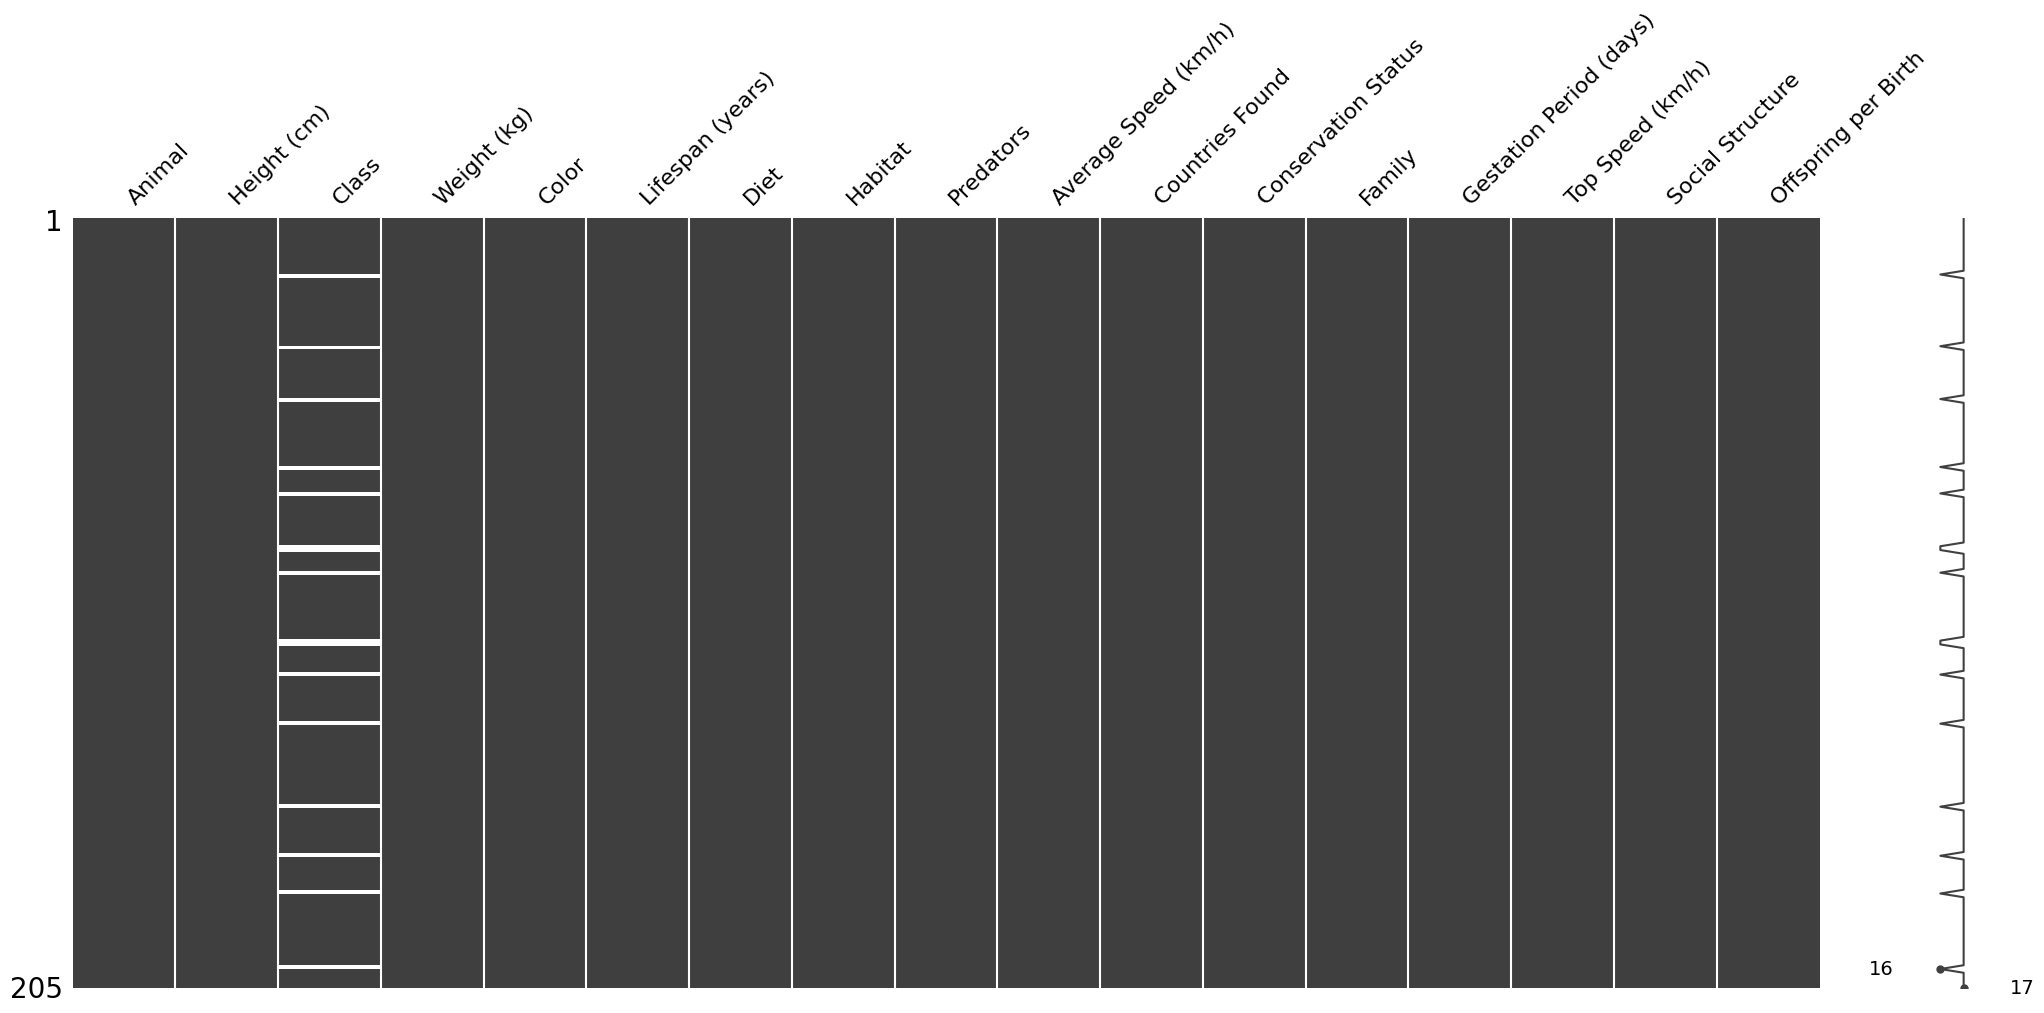

In [18]:
msno.matrix(df_animals)
df_animals.isna().sum()

In [21]:
df_animals[df_animals["Class"].isna()]["Animal"]

15     Atlantic Spotted Dolphin
34          Blue-Ringed Octopus
48               Common Dolphin
66           GalÃ¡pagos Penguin
73        Giant Pacific Octopus
87                      Hagfish
88                      Hagfish
94               Humpback Whale
112                     Manatee
113                    Mandrill
121                     Narwhal
134                       Potoo
156                 Sperm Whale
169             Tasmanian Tiger
179                     Tuatara
199              Woolly Mammoth
Name: Animal, dtype: object

This can be an easy fix by just looking up their class and adding it to the code above. This will be done in the preprocessing part of the project.

Another problem however is that although it looks like the original data frame has no null values, the creator just filled them in with other words. The below code snippet is an example.

In [28]:
df_animals[df_animals['Conservation Status'].str.contains("Not Evaluated")]

,Animal,Height (cm),Class,Weight (kg),Color,Lifespan (years),Diet,Habitat,Predators,Average Speed (km/h),Countries Found,Conservation Status,Family,Gestation Period (days),Top Speed (km/h),Social Structure,Offspring per Birth
6,Amazon Rainforest Frog,2-13,amphibian,Up to 0.5,Various,4-17,Insectivore,Amazon Rainforest,"Birds, Snakes",0.1-1,Amazon Rainforest,Not Evaluated,Dendrobatidae,10-15,0.8,Solitary,Up to 40
12,Arowana,Up to 120,fish,Up to 6.7,"Silver, Gold, Green",10-20,"Carnivore, Piscivore","Freshwater Rivers, Lakes","Birds, Larger Fish",16-32,"South America, Asia",Not Evaluated,Osteoglossidae,Not Applicable,32,Solitary,Not Applicable
24,Bearded Dragon,Up to 60,reptile,Up to 600,Various,6-15,Omnivore,"Deserts, Woodlands","Birds, Snakes",40-64,Australia,Not Evaluated,Agamidae,40-70,40-64,Solitary,Up to 24
31,Blue Morpho Butterfly,Up to 15,arthropod,Up to 0.028,Blue,1-2 weeks,Herbivore,Rainforests,"Birds, Bats",Not Applicable,Central and South America,Not Evaluated,Nymphalidae,Not Applicable,Not Applicable,Solitary,Not Applicable
39,Brazilian Wandering Spider,Up to 5,arthropod,Up to 0.006,Brown,1-2,Carnivore,Forests,"Birds, Mammals",Not Applicable,South and Central America,Not Evaluated,Ctenidae,21-35,Not Applicable,Solitary,"Up to 1,000"
46,Clownfish,7-10,fish,50-300,Orange,6-10,Omnivore,Coral Reefs,"Larger Fish, Anemones",8,"Indian, Pacific Oceans",Not Evaluated,Pomacentridae,6-10,1.6,Group-based,"Up to 1,000"
47,Coelacanth,Up to 200,fish,Up to 90,"Brown, Grey",Up to 60,Carnivore,"Deep-sea, Caves","Sharks, Humans",1.6,Western Indian Ocean,Not Evaluated,Latimeriidae,260-330 million years,Not Applicable,Solitary,Not Applicable
97,Japanese Giant Hornet,35-55,arthropod,Up to 6,"Yellow, Black",3-6,"Carnivore, Insectivore","Forests, Mountains","Birds, Bees",40-58,"Japan, China, Southeast Asia",Not Evaluated,Vespidae,1 week,Not Applicable,Colony-based,Thousands
104,Leaf-tailed Gecko,Up to 25,reptile,Up to 250,Various,10-15,Insectivore,"Rainforests, Madagascar","Birds, Snakes",0.8-1,Madagascar,Not Evaluated,Gekkonidae,45-60,Not Applicable,Solitary,1-2
115,Mantis Shrimp,Up to 30,arthropod,Up to 2.7,Various,Up to 20,Carnivore,Coral Reefs,Larger Fish,30-50,Oceans worldwide,Not Evaluated,Stomatopoda,20-30,30-50,Solitary,Hundreds


For those we will figure a method out depending on the feature we are working with and what makes sense to use.

### Visualizations

Are not possible at the moment since we only have objects at the moment. After the preprocessing part we can make ourselve a better picture of our data.